In [1]:
import os
import zipfile
from fairgraph import KGClient
import fairgraph.openminds.core as omcore
import fairgraph.openminds.controlledterms as terms
import fairgraph.openminds.ephys as ephys
import fairgraph.openminds.stimulation as stim
from fairgraph.openminds.core import DatasetVersion
import json
import glob
import numpy as np
from neo import get_io
from neo import io
from neo.io import AxonIO
import pandas as pd
from neo.io import AsciiSignalIO
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.signal import find_peaks

In [2]:
client = KGClient(host="core.kg.ebrains.eu", token=clb_oauth.get_token())

dataset_title = "Whole cell patch-clamp recordings of cerebellar stellate cells"
dataset_version = "v1"

# Use the follow_links parameter from the by_name method to avoid having to resolve every element of the "has_parts" property later
follow_links = {"versions": {"has_parts":{}}}

dataset = omcore.Dataset.by_name(dataset_title, client, follow_links= follow_links, scope="any")
dataset_version = dataset.versions if isinstance(dataset.versions, omcore.DatasetVersion) else [dsv for dsv in dataset.versions if dsv.version_identifier == dataset_version][0]

if not os.path.exists("downloads"):
    dataset_path = dataset_version.download("downloads", client, accept_terms_of_use=True)

with zipfile.ZipFile("downloads/hbp-d000020_PatchClamp-StellateCells_pub.zip", "r") as z:
    z.extractall("downloads")

In [3]:
# Select all StimulationActivivities from the DatasetVersion's "has_parts" property, no need to resolve
stimAct =[i for i in datasetVersion.has_parts if isinstance(i,stim.StimulationActivity)]

# Get a list of every EphysStimulus associated to each StimulationActivity in stimAct
ephysStim = []
for act in stimAct:
    if isinstance(act.stimuli, list):
        ephysStim.append([i.resolve(client, scope="any") for i in act.stimuli])
    else:
        ephysStim.append([act.stimuli.resolve(client, scope="any")])
# Note: ephysStim is a list of lists
speEphys= ephysStim[0][0].specifications.resolve(client, scope="any")
Metadata = speEphys.configuration

#Retrieve the metadata of the stimulation in configuration 
current_pulse_amplitudes = json.loads(Metadata)["amplitudes"]
onset = json.loads(Metadata)["onset"]
duration = json.loads(Metadata)["duration"]
interval = json.loads(Metadata)["interval"]

#convert value in ms to s
onset = onset/1000
duration = duration/1000
interval = interval/1000

NameError: name 'datasetVersion' is not defined

In [4]:
ccstep_files = [file_path for file_path in glob.glob("downloads/*/*.abf") if 'ccstep' in file_path]
for file_path in ccstep_files:
    io_ccstep =get_io(file_path)
    print(io_ccstep)

AxonIO: downloads/SC_Subject11_180417/180417-1404008-ccstep.abf
nb_block: 1
nb_segment:  [6]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject07_141217/141217-1412005-ccstep.abf
nb_block: 1
nb_segment:  [10]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject13_200218/200218-2002004-ccstep.abf
nb_block: 1
nb_segment:  [8]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject03_131117/131117-B_ccstep.abf
nb_block: 1
nb_segment:  [10]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject03_131117/131117-A_ccstep.abf
nb_block: 1
nb_segment:  [10]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]


In [5]:
iv_files = [file_path for file_path in glob.glob("downloads/*/*.abf") if 'iv' in file_path]
for file_path in iv_files:
    io_iv =get_io(file_path)
    print(io_iv)

AxonIO: downloads/SC_Subject07_141217/141217-1412001-iv.abf
nb_block: 1
nb_segment:  [8]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject13_200218/200218-2002000-iv.abf
nb_block: 1
nb_segment:  [8]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject08_160518/160518-1505002-iv.abf
nb_block: 1
nb_segment:  [8]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject14_240518/240518-2405000-iv.abf
nb_block: 1
nb_segment:  [8]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject09_161017/161017-1610000-iv.abf
nb_block: 1
nb_segment:  [8]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: do

In [6]:
EPSC_files = [file_path for file_path in glob.glob("downloads/*/*.abf") if 'EPSC' in file_path]
for file_path in EPSC_files:
    io_EPSC =get_io(file_path)
    print(io_EPSC)

AxonIO: downloads/SC_Subject08_160518/160518-1505013-EPSC_20 pulses50Hz.abf
nb_block: 1
nb_segment:  [1]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject08_160518/160518-1505014-EPSC_20 pulses100Hz.abf
nb_block: 1
nb_segment:  [1]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject08_160518/160518-1505015-EPSC_20 pulses200Hz.abf
nb_block: 1
nb_segment:  [1]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject14_240518/240518-2405007-EPSC_20 pulses200Hz.abf
nb_block: 1
nb_segment:  [1]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject14_240518/240518-2405017-EPSC_20 pulses50Hz.abf
nb_block: 1
nb_segment:  [1]
signal_streams: [Signals (chans: 2)]

In [7]:
EPSP_files = [file_path for file_path in glob.glob("downloads/*/*.abf") if 'EPSP' in file_path]
for file_path in EPSP_files:
    io_EPSP =get_io(file_path)
    print(io_EPSP)

AxonIO: downloads/SC_Subject09_161017/161017-1610026-EPSP.abf
nb_block: 1
nb_segment:  [1]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject04_131217/131217-0112060-EPSP.abf
nb_block: 1
nb_segment:  [1]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject04_131217/131217-0112058-EPSP.abf
nb_block: 1
nb_segment:  [1]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject04_131217/131217-0112056-EPSP.abf
nb_block: 1
nb_segment:  [1]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/SC_Subject16_301017/301017-3010012-EPSP.abf
nb_block: 1
nb_segment:  [1]
signal_streams: [Signals (chans: 2)]
signal_channels: [IN0, leak1]
spike_channels: []
event_channels: [Tag]



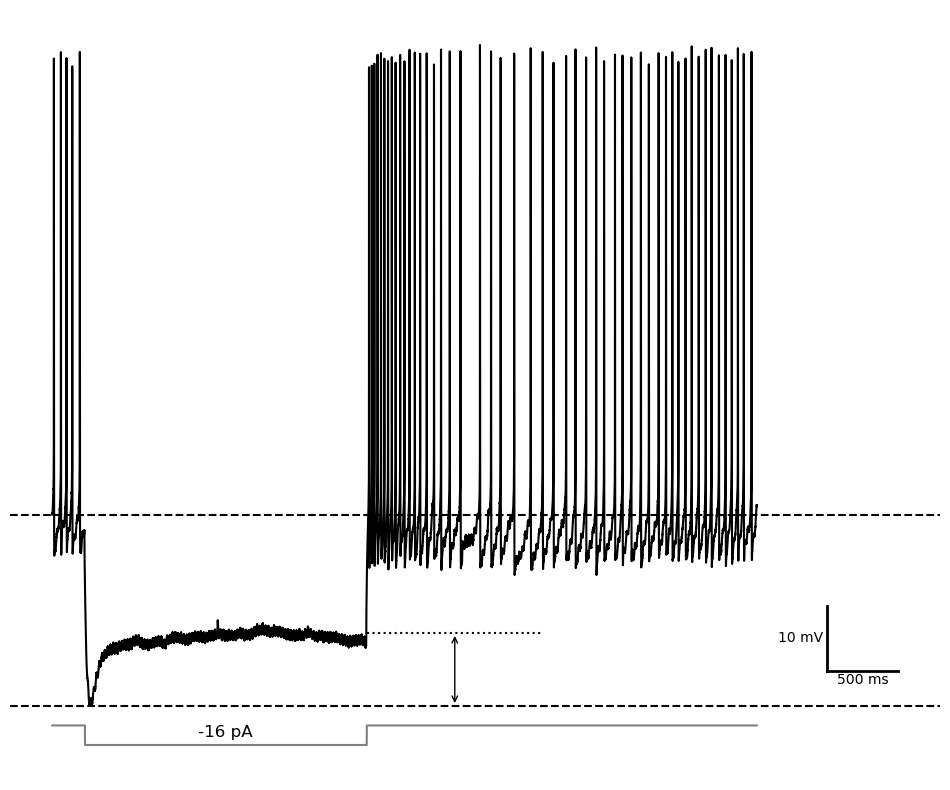

In [64]:
plt.figure(figsize=(12,10))    
plt.rcParams["figure.figsize"] = (7, 5)

# Charger les données
file_path = ("downloads/SC_Subject03_131117/131117-B_ccstep.abf")
reader = get_io(file_path)
data = reader.read(lazy=True)
seg0 = data[0].segments[0]
channel0 = seg0.analogsignals[0]
channel0 = channel0.load()
channel0np = np.array(channel0)

# Trouve la valeur minime du segment
mindf = channel0.min()
min_val = np.array(mindf)

# calcul de la moyenne et modification a des fins purement graphiques
mean_ch0=channel0np.mean()
mean_ch0 = mean_ch0 - 2

#création d'une liste faisant la même taille que le segment dont les valeurs sont égales à la valeurs minimales du segment
stim_pulse = np.full_like(channel0np,mindf)
stim_pulse = stim_pulse - 3


# Trouver les indices des valeurs en dessous de la moyenne
ind = np.where(channel0np < mean_ch0)[0]
stim_pulse[ind] += -3

# Calculer la position moyenne des indices
t = (ind[0] + ind[-1])/2

#Affichage du segment
plt.plot(channel0.times, channel0, c='black')
#plt.legend()

plt.axhline(y= channel0[0], color='black', linestyle='--')

#Affichage de la zone de stimulation
plt.plot(channel0.times ,stim_pulse, c='grey')
plt.text(channel0.times[round(ind.mean())],stim_pulse[0], '-16 pA', fontsize=12, color='black', ha='center', va='top')

#Affichage de la valeur minimum du segment
plt.axhline(y= min_val, color='black', linestyle='--')
plt.plot([channel0.times[ind[-1]],channel0.times[ind[-1]+ 5000]],[channel0[ind[-14]],channel0[ind[-14]]], c='black', linestyle=':')

# Ajouter une flèche entre la ligne horizontale (axhline) et la ligne de référence
plt.annotate(
    '', xy=(channel0.times[ind[-1]+2500], channel0[ind[-14]]),
    xytext=(channel0.times[ind[-1]+2500], min_val),
    arrowprops=dict(arrowstyle='<->', color='black', lw=1)
)

#Cacher les axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

## Ajouter une barre verticale pour représenter 10 mV
plt.plot([5.5, 5.5], [-65, -65 + 10], color='black', lw=2)
plt.text(5.15, -65 + 5, '10 mV', va='center')

# Ajouter une barre horizontale pour représenter 500 ms
plt.plot([5.5, 6], [-65, -65], color='black', lw=2)
plt.text(5.75, -65 - 2, '500 ms', ha='center')

plt.show()  


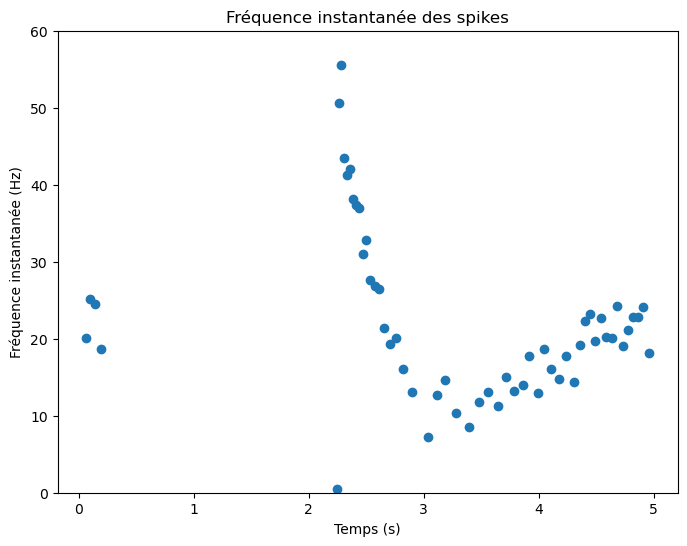

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from neo.io import AxonIO

def detect_and_refine_spikes(signal, threshold, window_size):
    """
    Détecte les spikes dans un signal en utilisant un seuil, puis affine la détection
    en prenant la valeur la plus haute du spike dans une fenêtre de recherche.

    Parameters:
    - signal: Le signal à analyser (array numpy).
    - threshold: Le seuil pour la détection initiale des spikes.
    - window_size: La taille de la fenêtre de recherche pour affiner les spikes.

    Returns:
    - refined_spike_indices: Les indices des spikes raffinés.
    """
    # Détection des spikes initiale (spikes au-dessus d'un seuil)
    spike_indices = np.where(signal > threshold)[0]

    # Affiner la détection des spikes en prenant la valeur la plus haute du spike
    refined_spike_indices = []
    for idx in spike_indices:
        # Définir la fenêtre de recherche autour de l'indice détecté
        start_idx = max(0, idx - window_size)
        end_idx = min(len(signal) - 1, idx + window_size)
        
        # Trouver l'indice de la valeur maximale dans cette fenêtre
        refined_idx = start_idx + np.argmax(signal[start_idx:end_idx+1])
        
        # Ajouter l'indice raffiné à la liste
        refined_spike_indices.append(refined_idx)

    # Supprimer les doublons
    refined_spike_indices = np.unique(refined_spike_indices)
    
    return refined_spike_indices

def find_edges(signal, spike_indices, derivative_threshold=0.1):
    """
    Trouver les points de début et de fin des potentiels d'action.

    Parameters:
    - signal: Le signal à analyser (array numpy).
    - spike_indices: Les indices des spikes détectés (array numpy).
    - derivative_threshold: Le seuil pour détecter les changements rapides dans le signal.

    Returns:
    - edges: Liste des tuples contenant les indices de début et de fin des potentiels d'action.
    """
    derivative = np.diff(signal)
    
    edges = []
    for idx in spike_indices:
        # Trouver le début du potentiel d'action
        start = np.where(derivative[:idx] < -derivative_threshold)[0]
        start = start[-1] if len(start) > 0 else 0
        
        # Trouver la fin du potentiel d'action
        end = np.where(derivative[idx:] > derivative_threshold)[0]
        end = idx + end[0] if len(end) > 0 else len(signal) - 1
        
        edges.append((start, end))
    return edges

# Charger les données
file_path = "downloads/SC_Subject03_131117/131117-B_ccstep.abf"
reader = AxonIO(file_path)
data = reader.read_block(lazy=False)
seg0 = data.segments[0]
channel0 = seg0.analogsignals[0]

# Conversion en tableau Numpy
channel0np = np.array(channel0).flatten()
times = np.array(channel0.times).flatten()

# Paramètres pour la détection des spikes
threshold = 25  # Ajustez ce seuil en fonction de vos données
window_size = 3  # Taille de la fenêtre pour vérifier les points voisins

# Détection et affinement des spikes
refined_spike_indices = detect_and_refine_spikes(channel0np, threshold, window_size)

# Trouver les débuts et fins des potentiels d'action
edges = find_edges(channel0np, refined_spike_indices)

# Calcul des durées des potentiels d'action
spike_durations = [times[end] - times[start] for start, end in edges]
start_indices = [start for start, end in edges]
end_indices = [end for start, end in edges]

# Calcul des intervalles de temps entre les débuts des spikes successifs
spike_times = times[refined_spike_indices]
intervals = np.diff(spike_times)

# Calcul des fréquences instantanées (inverse des intervalles)
frequencies = 1 / intervals

# Calcul des barres d'erreur (écart-type des fréquences)
mean_freq = np.mean(frequencies)
std_freq = np.std(frequencies)

# Tracer les fréquences des spikes
plt.figure(figsize=(8, 6))
plt.plot(spike_times[1:], frequencies, 'o')
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence instantanée (Hz)')
plt.ylim(0, 60)
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(0, 61, 10))
plt.title('Fréquence instantanée des spikes')
plt.show()


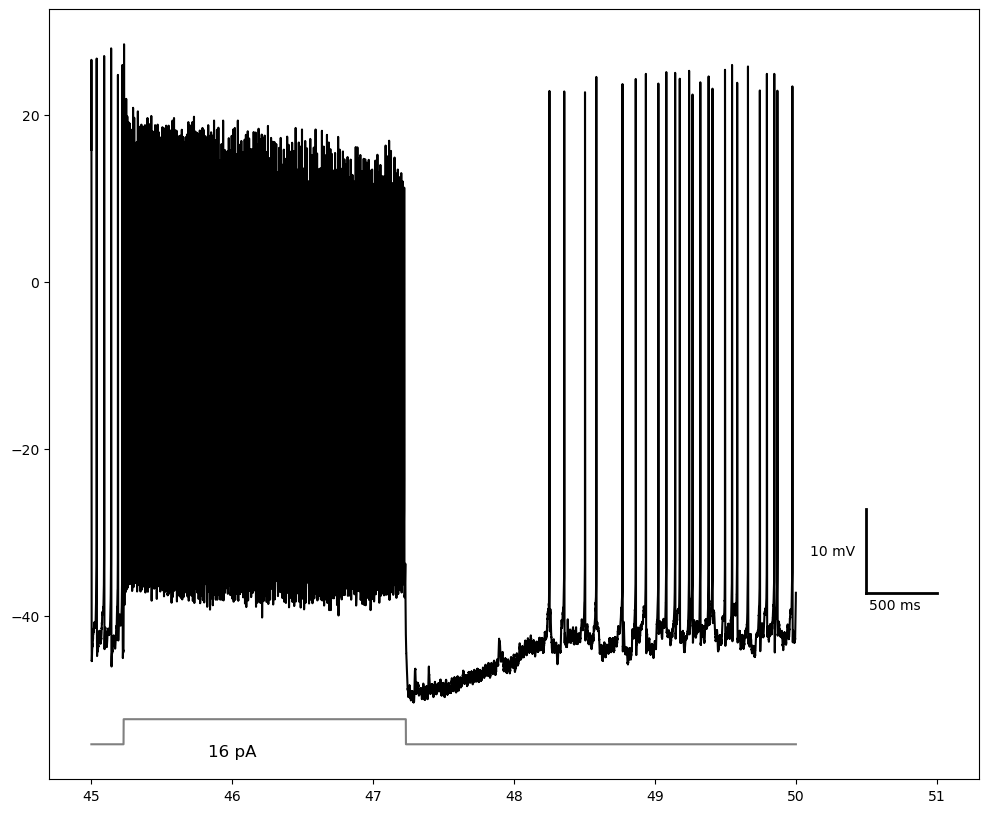

In [76]:
plt.figure(figsize=(12,10))    
plt.rcParams["figure.figsize"] = (7, 5)

# Charger les données
file_path = ("downloads/SC_Subject03_131117/131117-B_ccstep.abf")
reader = get_io(file_path)
data = reader.read(lazy=True)
seg0 = data[0].segments[-1]
channel0 = seg0.analogsignals[0]
channel0 = channel0.load()
channel0np = np.array(channel0)

# Trouver la valeur minimale du segment
mindf = channel0.min()
min_val = np.array(mindf)

# Calculer la moyenne et la modifier à des fins purement graphiques
mean_ch0 = channel0np.mean()
mean_ch0 = mean_ch0 - 5

# Créer une liste de la même taille que le segment avec des valeurs égales à la valeur minimale du segment
stim_pulse = np.full_like(channel0np, mindf)
stim_pulse = stim_pulse - 5

# Trouver les indices des valeurs en dessous de la moyenne
ind = np.where(channel0np > mean_ch0)[0]

# Filtrer pour obtenir les sous-séquences consécutives
subsequences = np.split(ind, np.where(np.diff(ind) != 1)[0] + 1)

# Trouver la sous-séquence consécutive la plus longue
longest_subseq = max(subsequences, key=len)

# Afficher le segment noir
plt.plot(channel0.times, channel0, c='black')

# Ajouter +2 aux valeurs de la sous-séquence consécutive la plus longue
stim_pulse[longest_subseq] += 3

# Afficher un trait bleu correspondant à toute la courbe noire, avec l'ajustement sur la sous-séquence la plus longue
plt.plot(channel0.times, stim_pulse, c='gray')
plt.text(channel0.times[round(len(longest_subseq)/2)],stim_pulse[0], '16 pA', fontsize=12, color='black', ha='center', va='top')

#Cacher les axes
#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
#plt.gca().tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

## Ajouter une barre verticale pour représenter 10 mV
plt.plot([50.5, 50.5], [channel0np[-1], channel0np[-1] + 10], color='black', lw=2)
plt.text(50.1, channel0np[-1] + 5, '10 mV', va='center')

# Ajouter une barre horizontale pour représenter 500 ms
plt.plot([50.5, 51], [channel0np[-1], channel0np[-1]], color='black', lw=2)
plt.text(50.7, channel0np[-1] - 2, '500 ms', ha='center')

plt.show()

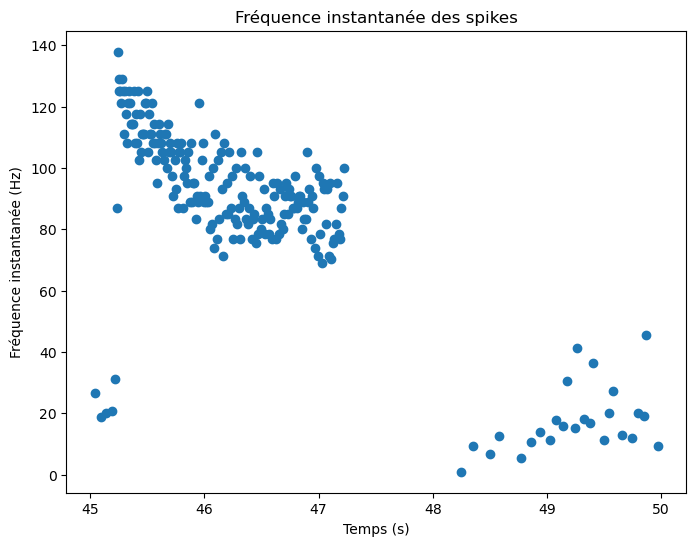

In [78]:
# Charger les données
file_path = "downloads/SC_Subject03_131117/131117-B_ccstep.abf"
reader = AxonIO(file_path)
data = reader.read_block(lazy=False)
seg0 = data.segments[-1]
channel0 = seg0.analogsignals[0]

# Conversion en tableau Numpy
channel0np = np.array(channel0).flatten()
times = np.array(channel0.times).flatten()

# Paramètres pour la détection des spikes
threshold = 0  # Ajustez ce seuil en fonction de vos données
window_size = 5  # Taille de la fenêtre pour vérifier les points voisins

# Détection et affinement des spikes
refined_spike_indices = detect_and_refine_spikes(channel0np, threshold, window_size)

# Trouver les débuts et fins des potentiels d'action
edges = find_edges(channel0np, refined_spike_indices)

# Calcul des durées des potentiels d'action
spike_durations = [times[end] - times[start] for start, end in edges]
start_indices = [start for start, end in edges]
end_indices = [end for start, end in edges]

# Calcul des intervalles de temps entre les débuts des spikes successifs
spike_times = times[refined_spike_indices]
intervals = np.diff(spike_times)

# Calcul des fréquences instantanées (inverse des intervalles)
frequencies = 1 / intervals

# Calcul des barres d'erreur (écart-type des fréquences)
mean_freq = np.mean(frequencies)
std_freq = np.std(frequencies)

# Tracer les fréquences des spikes
plt.figure(figsize=(8, 6))
plt.plot(spike_times[1:], frequencies, 'o')
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence instantanée (Hz)')
plt.title('Fréquence instantanée des spikes')
plt.show()
